INTRODUCCIÓN

De acuerdo con Darapaneni et al., 2022,uno de los principales problemas actuales de la mayoría de organizaciones a nivel global es la rotación de sus colaboradores. El autor refiere que una organización en promedio experimenta deserciones entre un 12 y 15%, generando incremento en los gastos para vincular nuevos colaboradores que satisfagan sus necesidades, con el agravante de la disminución de la producción mientras los nuevos colaboradores se adaptan al ritmo que las organizaciones requieren. Por su parte Rey Caldeyro (2021) refiere que en Estados Unidos en 2019 más de un 27% de los empleados renunciaron voluntariamente a sus puestos de trabajo y se estima que para 2023 esta cifra va a aumentar superando el 33% de la fuerza de trabajo. Esto implica un aumento del 8,3% en comparación con el 2018 y un crecimiento del 88% tomando como punto de referencia el año 2010. Es por ello que las organizaciones se han enfocado en la prevención de la deserción laboral, utilizando para ello modelos basados en regresión logística, redes neuronales, árboles de clasificación, bagging, random forest, gradient boosting, extreme gradient boosting, maquinas de soporte vectorial modelos ensamblados como herramientas que permitan predecir quién, cuándo y por qué un empleado pondrá fin a su carrera profesional (Rey Caldeyro 2021).

En este orden de ideas, en el presente trabajo se presenta inicialmente un análisis exploratorio de datos de una base de datos de deserción de IBM. Seguidamente se entrena y se evalua modelos de aprendizaje automático; a saber, regresión logística, Random Forest, máquina de soporte vectorial (SVM), K-vecino más cercano (KNN), árbol de decisión y Gaussian Naive Bayes; con el objeto de detectar con precisión la deserción para ayudar a cualquier organización a mejorar las diferentes estrategias de retención de empleados cruciales.

PROCEDENCIA DE LOS DATOS
La base de datos utiliza es propiedad de la empresa IBM. Consta de 1470 registros y 35 variables, incluida la variable de interés. El objetivo de la base de datos, es servir como instrumento para predecir la deserción de colaboradores a partir de características personales y profesionales. 

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [68]:
from sklearn.utils import shuffle
attrition = pd.read_csv('/Users/daritmartinez/jbooks/entregable/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition = shuffle(attrition)
attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1107,38,No,Travel_Frequently,888,Human Resources,10,4,Human Resources,1,1563,...,3,80,0,10,2,3,6,3,1,2
1232,35,No,Travel_Rarely,1370,Research & Development,27,4,Life Sciences,1,1728,...,2,80,1,17,3,3,7,7,0,7
903,29,No,Travel_Rarely,1329,Research & Development,7,3,Life Sciences,1,1260,...,2,80,2,6,2,3,6,0,1,0
762,26,Yes,Travel_Frequently,342,Research & Development,2,3,Life Sciences,1,1053,...,2,80,1,6,2,3,3,2,1,2
805,45,No,Non-Travel,1050,Sales,9,4,Life Sciences,1,1117,...,4,80,1,15,2,3,15,10,4,12


INTEGRIDAD DE LA BASE DE DATOS
A partir de la comprobación de integridad de la base de datos se encontró que de las 35 variables, 9 corresponden a categoricas y 26 a numericas. Para cada tipo de variables se descartó la existencia de valores nulos, es decir los datos no tienen valores faltantes. En las tablas se muestran las estadísticas resumidas de las variables.

In [69]:
cat_cols=attrition.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(attrition[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(cat_df)

from skimpy import skim
data=attrition
print(skim(data))

count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1470   │ │ int32       │ 26    │                                                          │
│ │ Number of columns │ 35     │ │ string      │ 9     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                        │   0 │      0 │      37 │    9.1 │     18 │     30 │     43 │     60 │ ▂▆█▅▃▂  │  │
│ │ DailyRate                  │   0 │      0 │     800 │    400 │    100 │    460 │   1200 │   1500 │ ██████  │  │
│ │ DistanceFromHome           │   0 │      0 │     9.2 │    8.1 │      1 │      2 │     14 │     29 │ █▅▁▂▁▁  │  │
│ │ Education                  │   0 │      0 │     2.9 │      1 │      1 │      2 │      4 │      5 │ ▂▄ █▆▁  │  │
│ │ EmployeeCount              │   0 │      0 │       1 │      0 │      1 │      1 │      1 │      1 │     █   │  │
│ │ EmployeeNumber             │   0 │      0 │    1000 │    600 │      1 │    490 │   1600 │   2100 │ ██▇▇██  │  │
│ │ EnvironmentSatisfact       │   0 │      0 │     2.7 │    1.1 │      1 │      2 │      4 │      4 │ ▅ ▅ ██  │  │
│ │ HourlyRate                 │   0 │      0 │      66 │     20 │     30 │     48 │     84 │    100 │ ▆█▇▇█▇  │  │
│ │ JobInvolvement             │   0 │      0 │     2.7 │   0.71 │      1 │      2 │      3 │      4 │ ▁ ▃ █▁  │  │
│ │ JobLevel                   │   0 │      0 │     2.1 │    1.1 │      1 │      1 │      3 │      5 │ ██ ▃▂▁  │  │
│ │ JobSatisfaction            │   0 │      0 │     2.7 │    1.1 │      1 │      2 │      4 │      4 │ ▅ ▅ ██  │  │
│ │ MonthlyIncome              │   0 │      0 │    6500 │   4700 │   1000 │   2900 │   8400 │  20000 │ █▇▂▁▁▁  │  │
│ │ MonthlyRate                │   0 │      0 │   14000 │   7100 │   2100 │   8000 │  20000 │  27000 │ ██▇▇█▇  │  │
│ │ NumCompaniesWorked         │   0 │      0 │     2.7 │    2.5 │      0 │      1 │      4 │      9 │ █▂▃▁▂▁  │  │
│ │ PercentSalaryHike          │   0 │      0 │      15 │    3.7 │     11 │     12 │     18 │     25 │ █▄▂▃▁▁  │  │
│ │ PerformanceRating          │   0 │      0 │     3.2 │   0.36 │      3 │      3 │      3 │      4 │ █    ▁  │  │
│ │ RelationshipSatisfac       │   0 │      0 │     2.7 │    1.1 │      1 │      2 │      4 │      4 │ ▅ ▅ ██  │  │
│ │ StandardHours              │   0 │      0 │      80 │      0 │     80 │     80 │     80 │     80 │     █   │  │
│ │ StockOptionLevel           │   0 │      0 │    0.79 │   0.85 │      0 │      0 │      1 │      3 │ █ █ ▂▁  │  │
│ │ TotalWorkingYears          │   0 │      0 │      11 │    7.8 │      0 │      6 │     15 │     40 │  ▆█▃▂▁  │  │
│ │ TrainingTimesLastYea       │   0 │      0 │     2.8 │    1.3 │      0 │      2 │      3 │      6 │ ▁▁█▇▂▃  │  │
│ │ WorkLifeBalance            │   0 │      0 │     2.8 │   0.71 │      1 │      2 │      3 │      4 │ ▁ ▃ █▁  │  │
│ │ YearsAtCompany             │   0 │      0 │       7 

None


VARIABLE DE INTERÉS
Attrition: corresponde a una variable binaria, la cual indica si el empleado abandonó la empresa o no (Yes, No).

A partir de la figura se observa que de los 1470 registros de la base de datos, la cantidad de colaboradores que no tienen intención de desertar tiene mayor presentación con un porcentaje del 83.9%. La categoría de interés (colaboradores que tienen intensión de desertar) representa únicamente el 16.1%. Lo anterior evidencia que el conjunto de datos se encuentra desbalanceado, con menor representación de la categoría que se quiere predecir, lo que puede resultar en un problema en el rendimiento de los modelos de predicción, ya que la categoría minoritaria puede ser mayormente ignorada, lo cual podría limitar la aplicación del modelo para predecir la deserción de los colaboradores de la empresa.

No     1233
Yes     237
Name: Attrition, dtype: Int64


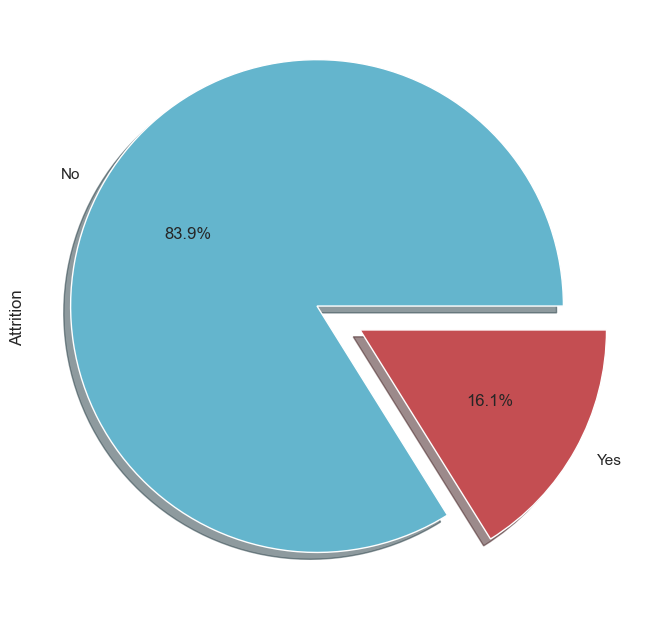

In [70]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
attrition['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(attrition['Attrition'].value_counts())

REPRESENTACIÓN DE HOMBRES Y MUJERES
El 63.3% de los colaboradores son hombres, mientras que las mujeres corresponden al 36.7%. De igual forma, se evidencia que los hombres son los que mayor número de rotaciones han presentado. Respecto al ingreso mensual se encontró que para los dos géneros son similares.

In [71]:
fig=go.Figure()
plot_df2=attrition[attrition.Attrition=='Yes']
plot_df2=plot_df2['Gender'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'Gender'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df2['Gender'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['Blue','Red']))
fig.update_yaxes(tickmode = 'array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [92]:
plot_df = attrition.groupby(['Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
figsex = px.bar(plot_df, x="Gender", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, category_orders={'Attrition': ['Yes', 'No']},
            color_discrete_map={'Yes': 'Green','No': 'Yellow'}) 
figsex.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
figsex.update_layout(title_text='Tasa de rotación según género', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30), )
figsex.update_xaxes(showticklabels=True,tickangle=30,col=2)
figsex.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
figsex.update_layout(xaxis_title="Género", yaxis_title="Porcentaje")
figsex.show()

In [91]:
figsalsex=go.Figure()
colors=['#FFA6CC','#7EB6FF']
for i, j in enumerate(attrition['Gender'].unique()):
    df_plot=attrition[attrition['Gender']==j]
    figsalsex.add_trace(go.Box(x=df_plot['Gender'], y=df_plot['MonthlyIncome'],
                         notched=True, line=dict(color=colors[i]),name=j))
figsalsex.update_layout(title='Salario por género',
                  boxmode='group', font_color='#28221D',
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],),
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
                  
figsalsex.update_layout(xaxis_title="Género", yaxis_title="Salario")
figsalsex.show()

ROTACIÓN VS EXPERIENCIA LABORAL
Se encontró que a menor experiencia laboral de los colaboradores mayor es la tasa de rotación, siendo os colaboradores con menos de cinco años de servico son los que mas rotan. Así mismo, se evidenció que a menor años de servicio, menor es el ingreso mensual, lo que puede sugerir que uno de los motivos de las rotaciones de los colaboradores es mejorar sus ingresos, tambien se observó que a mayor experiencia laboral mayor es el nivel del trabajo.

<AxesSubplot: title={'center': 'Rotación en función de los experiencia laboral'}, xlabel='TotalWorkingYears', ylabel='count'>

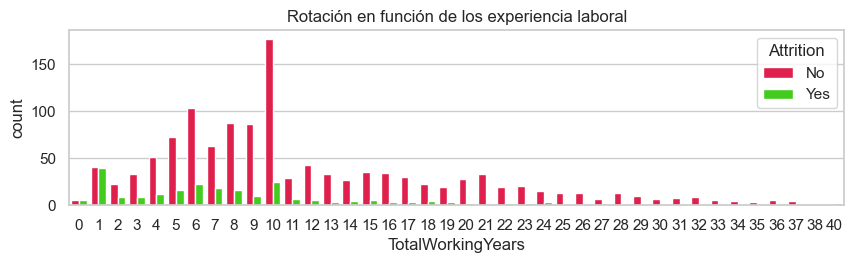

In [93]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.title('Rotación en función de los experiencia laboral')
sns.countplot(x=attrition['TotalWorkingYears'],hue=attrition['Attrition'],palette='prism_r')

In [89]:
plot_df = attrition.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#73AF8E', '#4F909B', '#707BAD', '#A89DB7','#C99193']
figsal = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome', facet_col="Attrition",
                 color='JobLevel',
                 color_discrete_sequence=col, 
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})
figsal.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Rotación en función de la experiencia laboral y el salario<br>',
                  yaxis=dict(title='Income',tickprefix='$'), 
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
figsal.update_layout(xaxis_title="Tiempo de experiencia", yaxis_title="Salario")
figsal.show()

<Figure size 1000x500 with 0 Axes>

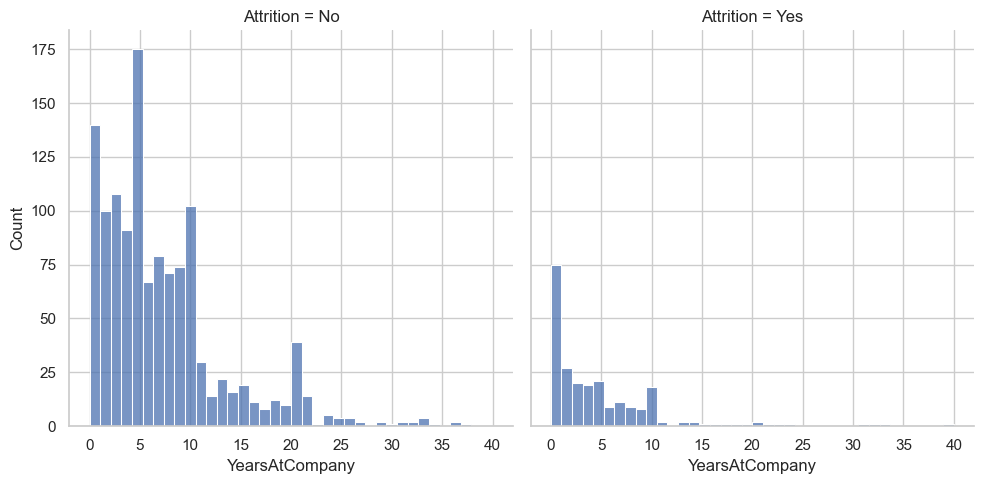

In [76]:
plt.figure(figsize=(10,5))
sns.displot(data = attrition, x = "YearsAtCompany", col = "Attrition")

ROTACIÓN VS RANGO ETARIO
Los colaboradores con un rango de edad entre los 30 y 35 años es el grupo más representativo en la organización. Adicionalmente se encontró que independientemente de si se es hombre o mujer los colaboradores cuyo grupo atareo es menor a 35 años son los que tienen mayor porcentaje de rotación.

In [77]:
attrition['AgeGroup']=pd.cut(attrition['Age'],bins=[15,20,25,30,35,40,45,50,55,60])
attrition['AgeGroup'] = attrition['AgeGroup'].astype('str')
cat_df=pd.DataFrame(attrition[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
cat_df.head(10)

count
column         value                        
Attrition      Yes                       237
               No                       1233
BusinessTravel Non-Travel                150
               Travel_Frequently         277
               Travel_Rarely            1043
Department     Human Resources            63
               Sales                     446
               Research & Development    961
EducationField Human Resources            27
               Other                      82

In [94]:
attrition['AgeGroup']=pd.cut(attrition['Age'],bins=[15,20,25,30,35,40,45,50,55,60])
attrition['AgeGroup'] = attrition['AgeGroup'].astype('str')
cat_df=pd.DataFrame(attrition[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
plot_df = attrition.groupby(['Gender','AgeGroup'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
figage = px.bar(plot_df, x="AgeGroup", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
            color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'}) 
figage.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
figage.update_layout(title_text='Tasa de rotación por grupo de edad y género', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
figage.update_xaxes(showticklabels=True,tickangle=30,col=2)
figage.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
figage.update_layout(xaxis_title="Grupo etáreo")

CORRELACIONES ENTRE LAS VARIABLES NUMÉRICAS
Se encontró mayor correlación entre las variable nivel de trabajo (JobLevel) con ingreso mensual (Monthly Income), al igual que TotalWorkingYears (total de años de trabajo) con nivel de trabajo (JobLevel). Lo que se busca para la realización del modelo predictivo se busca que las variables no estén demasiado correlacionadas, con el fin de garantizar que no hay información redundante. En el caso que se tengan muchas variables correlacionadas entre si una opción es realizar análisis de componentes principales con el fin de la cantidad de variables.

Verificación del supuesto de normalidad

In [ ]:
numeric=['Age','DailyRate','DistanceFromHome',
'Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction','HourlyRate','JobInvolvement',
'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours',	
'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',	
'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
]
numeric
for i in numeric:
    #print(attrition[i])
    print(i,':', stats.shapiro(attrition[i]))

CORRELACIONES ENTRE LAS VARIABLES NUMÉRICAS
Se encontró mayor correlación entre las variable nivel de trabajo (JobLevel) con ingreso mensual (Monthly Income), al igual que TotalWorkingYears (total de años de trabajo) con nivel de trabajo (JobLevel). Lo que se busca para la realización del modelo predictivo se busca que las variables no estén demasiado correlacionadas, con el fin de garantizar que no hay información redundante. En el caso que se tengan muchas variables correlacionadas entre si una opción es realizar análisis de componentes principales con el fin de la cantidad de variables.

In [87]:
cat_cols=[]
for i in attrition.columns:
    if attrition[i].nunique() <= 5 or attrition[i].dtype == object:
        cat_cols.append(i)
df=attrition.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
corr=df.corr('spearman').round(2)
x=corr.index.tolist()
y=corr.columns.tolist()
z=corr.to_numpy()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y}= %{z}",
                                  colorscale='GnBu')
fig.update_yaxes(autorange="reversed")
fig.update_layout(title="Coeficientes de correlación de Sperman", 
                  font_color='#28221D',margin=dict(t=180),height=600)
fig.show()



C:\Users\GAM\AppData\Local\Temp\ipykernel_13636\1860063447.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
import dash
from dash import dcc
from dash import html
from dash import dash_table

import plotly.express as px
import matplotlib.pyplot as plt

import plotly.tools
import pandas as pd
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
import numpy as np
from sklearn.metrics import auc, roc_auc_score, roc_curve
from dash.dependencies import Input, Output
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import svm

# Create a label encoder object
le = LabelEncoder()

le_count = 0
for col in attrition.columns[1:]:
    if attrition[col].dtype == 'object':
        if len(list(attrition[col].unique())) <= 2:
            le.fit(attrition[col])
            attrition[col] = le.transform(attrition[col])
            le_count += 1

# convert rest of categorical variable into dummy
attrition = pd.get_dummies(attrition, drop_first=True)

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
attrition_col = list(attrition.columns)
attrition_col.remove('Attrition')
for col in attrition_col:
    attrition[col] = attrition[col].astype(float)
    attrition[[col]] = scaler.fit_transform(attrition[[col]])
attrition['Attrition'] = pd.to_numeric(attrition['Attrition'], downcast='float')
attrition.head()

names1 = ['No', 'Si']
fig = px.pie(values=attrition.Attrition.value_counts(), names=names1)
fig.update_layout(title="Tasa de rotación")
fig.show()




In [ ]:
target = attrition['Attrition'].copy()
# let's remove the target feature and redundant features from the dataset
attrition.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)

# dividiendo la base de datos
X_train, X_test, y_train, y_test = train_test_split(attrition,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target) 



# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))


acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
attrition_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    attrition_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
attrition_results.sort_values(by=['ROC AUC Mean'], ascending=False)


def repetir(lista, veces):
    salida = []
    for elemento in lista:
        salida.extend([elemento] * veces)
    return salida

import plotly.express as px
df = pd.DataFrame(np.concatenate((auc_results)))
df['Algoritmo']=repetir(names,10)
figbox = px.box(df, x=df.Algoritmo, y=0,
                 width=750, height=400)








def generate_table(dataframe):
    return html.Table([ 
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(min(len(dataframe), 6))
        ])
    ])


# LogisticRegression
param_grid = {'C': np.arange(0.1, 2, 0.1)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      #iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)
log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_

fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
figlogreg = px.line(x=fpr, y=tpr, title='Logistic Regression')
figlogreg.update_layout(xaxis_title="Tasa de falsos positivos", yaxis_title="Tasa de verdaderos positivos")

# RandomForestClassifier
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [100],
              'min_samples_split':[8],
              'min_samples_leaf': [3],
              'max_depth': [15]}

rf_obj = GridSearchCV(rf_classifier,
                        #iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = rf_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
figrf = px.line(x=rf_fpr, y=rf_tpr, title='Random Forest')
figrf.update_layout(xaxis_title="Tasa de falsos positivos", yaxis_title="Tasa de verdaderos positivos")

# SMV

smv = SVC(gamma='auto', random_state=7)
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
smv_obj =  GridSearchCV(smv,
                        #iid=True,
                        param_grid=param_grid,
                        scoring='roc_auc',cv=5)
grid_fit = smv_obj.fit(X_train, y_train)
smv_opt = grid_fit.best_estimator_

smv_fpr, smv_tpr, smv_thresholds = roc_curve(y_test, smv_opt.decision_function(X_test))
figsmv = px.line(x=smv_fpr, y=smv_tpr, title='Soporte Maquina Vectorial')
figsmv.update_layout(xaxis_title="Tasa de falsos positivos", yaxis_title="Tasa de verdaderos positivos")



# KNN

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 4, 5]} # hyper-parameter list to fine-tune
knn_obj =  GridSearchCV(knn,
                        #iid=True,
                        param_grid=param_grid,
                        scoring='roc_auc')
knn_fit = knn_obj.fit(X_train, y_train)
knn_opt = knn_fit.best_estimator_

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_opt.predict_proba(X_test)[:,1])
figknn = px.line(x=knn_fpr, y=knn_tpr, title='KNN')
figknn.update_layout(xaxis_title="Tasa de falsos positivos", yaxis_title="Tasa de verdaderos positivos")


# Decision Tree Classifier

dtc = DecisionTreeClassifier(random_state=7)
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtc_obj =  GridSearchCV(dtc,
                        #iid=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=5)
dtc_fit = dtc_obj.fit(X_train, y_train)
dtc_opt = dtc_fit.best_estimator_

dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_opt.predict_proba(X_test)[:,1])
figdtc = px.line(x=dtc_fpr, y=dtc_tpr, title='Decision Tree Classifier')
figdtc.update_layout(xaxis_title="Tasa de falsos positivos", yaxis_title="Tasa de verdaderos positivos")


# GaussianNB

nb_classifier = GaussianNB()

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(nb_classifier, 
                 param_grid=param_grid, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='roc_auc') 
gs_NB_fit = gs_NB.fit(X_train, y_train)
gs_NB_opt = gs_NB_fit.best_estimator_

gs_fpr, gs_tpr, gs_thresholds = roc_curve(y_test, gs_NB_opt.predict_proba(X_test)[:,1])
figgs = px.line(x=gs_fpr, y=gs_tpr, title='Gaussian NB')
figgs.update_layout(xaxis_title="Tasa de falsos positivos", yaxis_title="Tasa de verdaderos positivos")

In [ ]:
figlogreg.show()